In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

housing = pd.read_csv('housing.csv', header=0, sep=',')
# housing.head()
# housing.tail()
# housing[3:7]
# housing[:7]
# housing[-5:]
# housing.shape

# housing.info()
# housing.columns

# housing['ocean_proximity']
# housing['ocean_proximity'].unique()
# housing['ocean_proximity'].value_counts()
# housing[housing['ocean_proximity'] == 'ISLAND']
# housing[housing['ocean_proximity'] == 'ISLAND']['population']
# housing[housing['ocean_proximity'] == 'ISLAND'][['population','ocean_proximity']]
# housing.describe()
# housing.hist(bins=50, figsize=(20,15))
# plt.show()
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) 
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


<Axes: xlabel='longitude', ylabel='latitude'>

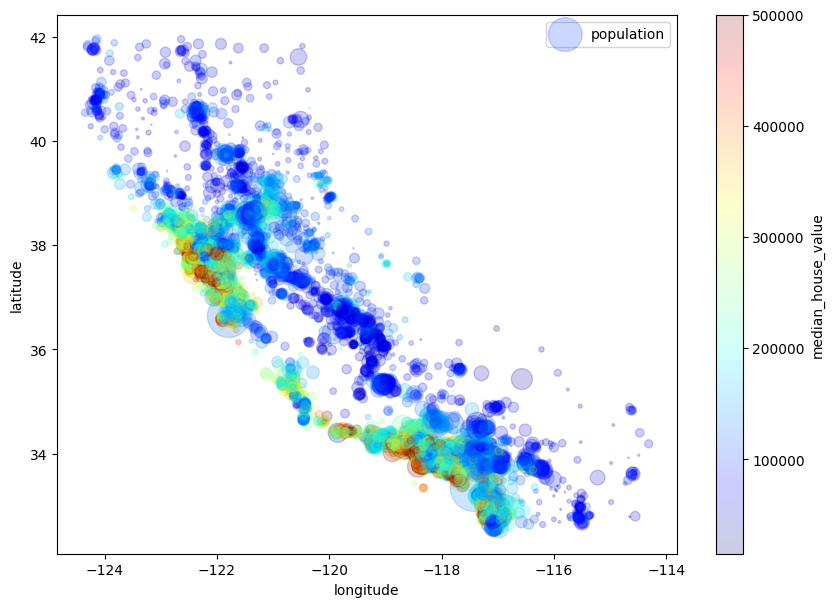

In [31]:
data = train_set.copy()
data.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    s=data["population"] / 30,
    label="population",
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    figsize=(10, 7),
    alpha=0.2,
)

In [32]:
# standard correlation coefficient [1 , -1]
corr_matrix = data.drop(["ocean_proximity"] ,axis=1).corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

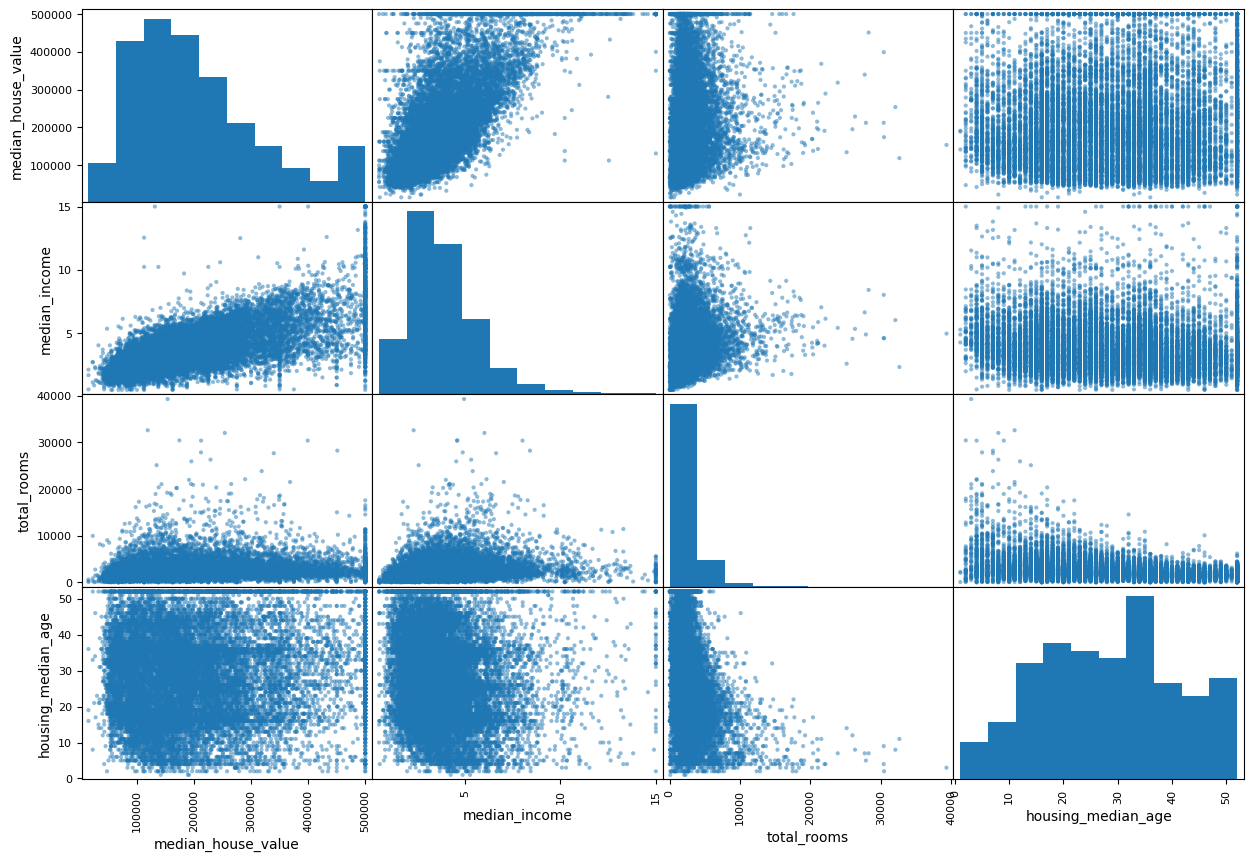

In [33]:
features = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(data[features], figsize=(15,10)),
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

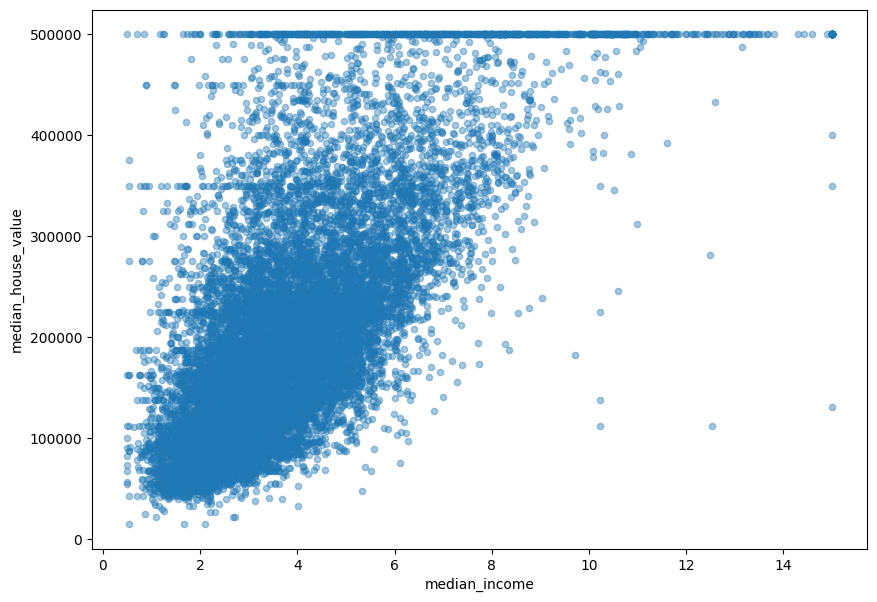

In [34]:
data = train_set.copy()
data.plot(kind="scatter", x="median_income", y="median_house_value", figsize=(10, 7), alpha=0.4)

In [35]:
data["total_rooms_per_households"] = data["total_rooms"]/data["households"]
data["total_bedrooms_per_total_rooms"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_households"] = data["population"]/data["households"]
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_per_households,total_bedrooms_per_total_rooms,population_per_households
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,6.268421,0.180940,2.300000


In [36]:
# standard correlation coefficient [1 , -1]
corr_matrix = data.drop(["ocean_proximity"] ,axis=1).corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value                1.000000
median_income                     0.690647
total_rooms_per_households        0.158485
total_rooms                       0.133989
housing_median_age                0.103706
households                        0.063714
total_bedrooms                    0.047980
population_per_households        -0.022030
population                       -0.026032
longitude                        -0.046349
latitude                         -0.142983
total_bedrooms_per_total_rooms   -0.257419
Name: median_house_value, dtype: float64